# ACP sur Covid19

> Realise par : EL FATHI Zakaria<br>
> Encadre par : Pr. GHAZDALI Abdelghani

---
Import des librairies necessaires:

In [64]:
import csv
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import fanalysis.pca as fanal
from sklearn.decomposition import PCA

---
Lecture des donnees:

In [65]:
data_fichier = "./materials/Data Covid.csv"
data = pd.read_csv(data_fichier)
pd.DataFrame(data)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,1,9,2021-01-03,0,0,NaN,NaN,NaN,21,0
1,44,9,2021-04-01,1,0,1.0,0.0,0.0,230,1
2,75,19,2021-04-14,2,1,0.0,0.0,1.0,115,0
3,4,19,2021-03-02,0,0,NaN,NaN,NaN,34,1
4,52,39,2021-04-04,22,4,18.0,0.0,0.0,431,3
...,...,...,...,...,...,...,...,...,...,...
35482,6,49,2021-01-14,0,0,NaN,NaN,NaN,78,7
35483,44,0,2021-05-08,2162,429,1202.0,509.0,22.0,35589,9810
35484,53,49,2020-12-24,14,3,NaN,NaN,NaN,228,3
35485,2,90,2021-04-25,4,0,4.0,0.0,0.0,13,8


---
La moyenne:

In [66]:
# Supprimer la colonne jour contenant les string
data = data.drop('jour', axis=1)
d = pd.DataFrame(data)
moy = np.mean(d.values,axis=0)
for i in range (4,7):
    np.put(moy, i, 0)
print(moy)


[  39.40302082   48.21560008  214.53075774   32.51779525    0.
    0.            0.         2909.9882774   666.77572069]


---
Ecart-type

In [67]:
d = pd.DataFrame(data)
moyenne = np.mean(data, axis=0)

tableauCentre = data.values
for i in range(0,2):
	for row in tableauCentre:
		row[i] = row[i] - moyenne.values[i]
pd.DataFrame(tableauCentre,index=data.index, columns=data.columns)

X = tableauCentre - moyenne.values
# convert NaN to 0
X = np.nan_to_num(X)
S = np.std(X,axis=0,ddof=0)
pd.DataFrame(S,index=data.columns)

,0
reg,32.268679
cl_age90,30.268600
hosp,573.448767
rea,98.822208
HospConv,209.977195
SSR_USLD,123.168712
autres,6.113419
rad,7864.154725
dc,1862.293403


---
Centree reduite

In [68]:
Z = X

for i in range(0,2):
	for row in Z:
		row[i] = row[i] / S[i]

pd.DataFrame(Z,index=data.index)

,0,1,2,3,4,5,6,7,8
0,-2.411194,-2.888512,-214.530758,-32.517795,0.000000,0.000000,0.000000,-2888.988277,-666.775721
1,-1.078632,-2.888512,-213.530758,-32.517795,-94.827412,-59.806364,-2.796091,-2679.988277,-665.775721
2,-0.117948,-2.558136,-212.530758,-31.517795,-95.827412,-59.806364,-1.796091,-2794.988277,-666.775721
3,-2.318225,-2.558136,-214.530758,-32.517795,0.000000,0.000000,0.000000,-2875.988277,-665.775721
4,-0.830714,-1.897385,-192.530758,-28.517795,-77.827412,-59.806364,-2.796091,-2478.988277,-663.775721
...,...,...,...,...,...,...,...,...,...
35482,-2.256245,-1.567010,-214.530758,-32.517795,0.000000,0.000000,0.000000,-2831.988277,-659.775721
35483,-1.078632,-3.185849,1947.469242,396.482205,1106.172588,449.193636,19.203909,32679.011723,9143.224279
35484,-0.799724,-1.567010,-200.530758,-29.517795,0.000000,0.000000,0.000000,-2681.988277,-663.775721
35485,-2.380204,-0.212471,-210.530758,-32.517795,-91.827412,-59.806364,-2.796091,-2896.988277,-658.775721


---
Variance covariance

In [69]:
X = tableauCentre - moyenne.values
# convert NaN to 0
X = np.nan_to_num(X)
matriceCov = np.cov(X,ddof=0,rowvar=False) 
pd.DataFrame(matriceCov)

,0,1,2,3,4,5,6,7,8
0,1041.267619,-0.967270,1.493826e+03,167.822371,2.960522e+02,210.438613,7.189335,1.757532e+04,4.139664e+03
1,-0.967270,916.188166,-2.261240e+03,-466.148157,-6.335742e+02,-291.006414,-29.402240,-3.977398e+04,-4.851890e+03
2,1493.826165,-2261.239548,3.288435e+05,52341.967096,8.486451e+04,47951.965309,2036.856383,3.633162e+06,8.676345e+05
3,167.822371,-466.148157,5.234197e+04,9765.828740,1.645890e+04,8865.581957,408.146739,6.090000e+05,1.348874e+05
4,296.052197,-633.574162,8.486451e+04,16458.895948,4.409042e+04,23319.852823,995.336905,1.076205e+06,2.539428e+05
5,210.438613,-291.006414,4.795197e+04,8865.581957,2.331985e+04,15170.531682,595.998847,7.425028e+05,1.765493e+05
6,7.189335,-29.402240,2.036856e+03,408.146739,9.953369e+02,595.998847,37.373892,3.457550e+04,7.411974e+03
7,17575.320615,-39773.975831,3.633162e+06,608999.963181,1.076205e+06,742502.845037,34575.500704,6.184493e+07,1.410113e+07
8,4139.663670,-4851.890158,8.676345e+05,134887.426921,2.539428e+05,176549.271721,7411.974261,1.410113e+07,3.468137e+06


---
matrice de correlation 

In [70]:
matriceCorr = pd.DataFrame(Z, columns=data.columns, index=data.index).corr()
print(matriceCorr)

               reg  cl_age90      hosp       rea  HospConv  SSR_USLD  \
reg       1.000000 -0.000990  0.080728  0.052628  0.043693  0.052947   
cl_age90 -0.000990  1.000000 -0.130275 -0.155839 -0.099686 -0.078057   
hosp      0.080728 -0.130275  1.000000  0.923636  0.704789  0.678909   
rea       0.052628 -0.155839  0.923636  1.000000  0.793184  0.728370   
HospConv  0.043693 -0.099686  0.704789  0.793184  1.000000  0.901682   
SSR_USLD  0.052947 -0.078057  0.678909  0.728370  0.901682  1.000000   
autres    0.036444 -0.158893  0.581007  0.675581  0.775379  0.791518   
rad       0.069258 -0.167092  0.805635  0.783629  0.651735  0.766559   
dc        0.068887 -0.086074  0.812445  0.732941  0.649405  0.769693   

            autres       rad        dc  
reg       0.036444  0.069258  0.068887  
cl_age90 -0.158893 -0.167092 -0.086074  
hosp      0.581007  0.805635  0.812445  
rea       0.675581  0.783629  0.732941  
HospConv  0.775379  0.651735  0.649405  
SSR_USLD  0.791518  0.766559  0.7

---
polynome caracteristique

In [71]:
valPropres = np.linalg.eigvals(matriceCorr)
pd.DataFrame(valPropres,index=["a1","a2","a3","a4","a5","a6","a7","a8","a9"])

,0
a1,5.564858
a2,1.003801
a3,0.981782
a4,0.640732
a5,0.439556
a6,0.235644
a7,0.014429
a8,0.063963
a9,0.055234


---
Eboulis des valeurs propres

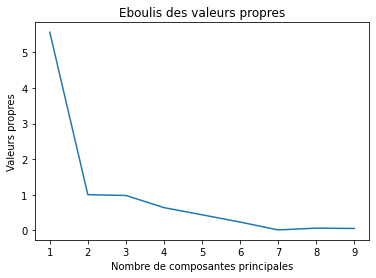

In [72]:
plt.plot(np.arange(1,data.shape[1]+1), valPropres)
plt.title("Eboulis des valeurs propres")
plt.ylabel("Valeurs propres")
plt.xlabel("Nombre de composantes principales")
plt.show()

---
---
> Modele ACP

In [73]:
# model_acp = PCA(svd_solver='full')
# acpCord = model_acp.fit_transform(Z)

la représentation des individus dans l’espace des 2 axes principaux d’inertie

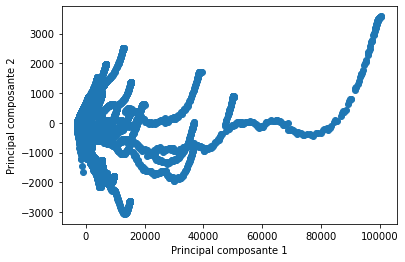

In [74]:

# Créer un objet PCA
pca = PCA()

# Appliquer l'ACP aux données
principal_components = pca.fit_transform(Z)

# Récupérer les coordonnées des axes principaux
principal_x = principal_components[:,0]
principal_y = principal_components[:,1]

# Tracer les axes principaux
plt.scatter(principal_x, principal_y)
plt.xlabel('Principal composante 1')
plt.ylabel('Principal composante 2')
plt.show()


---
la qualité de la représentation des individus dans cet espace

In [75]:
di = np.sum(Z**2,axis=1) 
cos2 = principal_components**2
for j in range(data.shape[1]):
    cos2[:,j] = cos2[:,j]/di
    
pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}, index=data.index)


,COS2_1,COS2_2
0,0.999349,0.000017
1,0.998873,0.000581
2,0.999301,0.000202
3,0.999337,0.000024
4,0.998057,0.001660
...,...,...
35482,0.999294,0.000042
35483,0.997483,0.002194
35484,0.999040,0.000377
35485,0.999558,0.000010


---
cercle de correlation


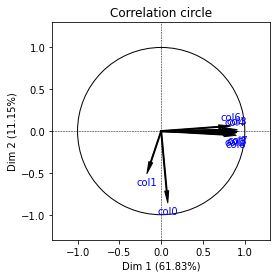

,0,1,2,3,4,5,6,7,8
0,0.000123,0.008146,0.000715,0.000699,5.770479e-06,0.000509,0.000294,0.000151,1.819638e-04
1,0.000458,0.000811,0.004635,0.000033,1.626077e-07,0.000211,0.000027,0.000031,5.999672e-04
2,0.000400,0.000551,0.006240,0.000020,4.252141e-06,0.000011,0.000006,0.000011,1.150812e-03
3,0.000133,0.005952,0.000202,0.000680,4.969967e-06,0.000344,0.000222,0.000128,7.200918e-05
4,0.000452,0.000089,0.000864,0.000041,2.702616e-05,0.000014,0.000132,0.000336,3.527323e-10
...,...,...,...,...,...,...,...,...,...
35482,0.000169,0.002272,0.000853,0.000557,3.296498e-06,0.000046,0.000076,0.000074,4.976527e-05
35483,0.059966,0.000882,0.000667,0.000045,1.119176e-05,0.011682,0.000300,0.119215,3.547690e-02
35484,0.000128,0.000341,0.000107,0.000964,1.566213e-08,0.000019,0.000007,0.000056,3.261267e-05
35485,0.000718,0.000243,0.007939,0.000397,1.209833e-05,0.000239,0.000191,0.000111,1.973245e-04


In [79]:
acp=fanal.PCA(std_unit=True)
acp.fit(Z)
acp.correlation_circle(num_x_axis=1, num_y_axis=2)
pd.DataFrame(acp.row_contrib_[:,:17])